## Packages to be considered

In [1]:
import numpy as np
import pandas as pd
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np #scientific computation
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets 
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
# from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression
import os
import datetime
from pylab import rcParams
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

## Set Directory

In [2]:
os.chdir("C:/Users/Ao/Desktop/machine learning 2")

## Data Preparation

In [3]:
df_expedia = pd.read_csv("clean040519.csv")

In [4]:
df_expedia_temp = df_expedia.groupby("srch_id").agg({"booking_bool": np.sum, "srch_id": lambda x: x.nunique()})
df_expedia_temp = df_expedia_temp[df_expedia_temp.booking_bool != 0]
list_of_searh_id_with_booking = df_expedia_temp.iloc[:, np.r_[0,1]]
list_search_id_with_bookings = list_of_searh_id_with_booking.index.tolist()

#The code below helps us find the search ids with bookings in the dataset. This eliminates the search ids with no bookings
df_expedia_clean = df_expedia[df_expedia['srch_id'].isin(list_search_id_with_bookings)] 

In [5]:
# This helps us see how many NaN are present in the dataset. 
df_expedia_clean.isnull().sum(axis = 0) 

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
click_bool                     0
booking_bool                   0
month                          0
dtype: int64

In [6]:
# Removed all the rows with the NaN. May want to keep prop_review_score.
df = df_expedia_clean

In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month

In [8]:
print(df['click_bool'].value_counts(1)*100)
print()
print(df['booking_bool'].value_counts(1)*100)


False    95.600808
True      4.399192
Name: click_bool, dtype: float64

False    96.006532
True      3.993468
Name: booking_bool, dtype: float64


In [9]:
# convert 1/0 integer values to boolean field and some integers or floats to objects
df['click_bool'] = df['click_bool'].astype('bool')
df['booking_bool'] = df['booking_bool'].astype('bool')
df['visitor_location_country_id'] = df['visitor_location_country_id'].astype('category')
df['prop_country_id'] = df['prop_country_id'].astype('category')
df['prop_id'] = df['prop_id'].astype('category')
df['prop_brand_bool'] = df['prop_brand_bool'].astype('bool')
df['promotion_flag'] = df['promotion_flag'].astype('bool')
df['srch_destination_id'] = df['srch_destination_id'].astype('category')
df['srch_saturday_night_bool'] = df['srch_saturday_night_bool'].astype('bool')
df['month'] = df['month'].astype('category')
df['position'] = df['position'].astype('category')

In [10]:
for k, v in df.nunique().to_dict().items():
    print('{}={}'.format(k,v))

srch_id=276593
date_time=274270
site_id=34
visitor_location_country_id=215
prop_country_id=171
prop_id=129667
prop_starrating=6
prop_review_score=10
prop_brand_bool=2
prop_location_score1=337
prop_log_historical_price=391
position=40
price_usd=77131
promotion_flag=2
srch_destination_id=20126
srch_length_of_stay=32
srch_booking_window=410
srch_adults_count=9
srch_children_count=10
srch_room_count=8
srch_saturday_night_bool=2
click_bool=2
booking_bool=2
month=8


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926136 entries, 0 to 6926135
Data columns (total 24 columns):
srch_id                        int64
date_time                      datetime64[ns]
site_id                        int64
visitor_location_country_id    category
prop_country_id                category
prop_id                        category
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                bool
prop_location_score1           float64
prop_log_historical_price      float64
position                       category
price_usd                      float64
promotion_flag                 bool
srch_destination_id            category
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_bool       bool
click_bool                     bool
booking_bool                   bool
month    

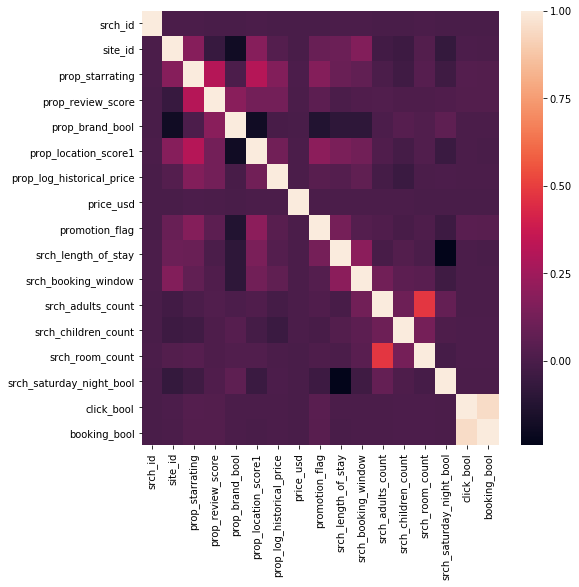

In [12]:
rcParams['figure.figsize'] = 8,8
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## data preparation for modeling

In [13]:
# drop date_time, position
df = df.drop(['date_time', 'position'], axis=1)

In [14]:
# extract all non-numeric columns
col_encode = list(df.select_dtypes(exclude=['number','bool']))

# save a copy for encoded offers data
df_encode = df

In [15]:
col_encode

['visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'srch_destination_id',
 'month']

In [17]:
# encode non-numeric columns
df_encode[col_encode] = df_encode[col_encode].apply(LabelEncoder().fit_transform)


In [18]:
# convert all encoded variables back to categorical
for col in col_encode:
    df_encode[col] = df_encode[col].astype('category')

In [19]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926136 entries, 0 to 6926135
Data columns (total 22 columns):
srch_id                        int64
site_id                        int64
visitor_location_country_id    category
prop_country_id                category
prop_id                        category
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                bool
prop_location_score1           float64
prop_log_historical_price      float64
price_usd                      float64
promotion_flag                 bool
srch_destination_id            category
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_bool       bool
click_bool                     bool
booking_bool                   bool
month                          category
dtypes: bool(5), category(5), float64(4), int64(8)
memo

In [20]:
# log transfer
df_encode.price_usd += 0.000001
df_encode['log_price'] = np.log(df_encode.price_usd)

In [21]:
df_encode['price_usd'].describe()

count    6.926136e+06
mean     2.314613e+02
std      1.448883e+04
min      1.000000e-06
25%      8.400000e+01
50%      1.190000e+02
75%      1.790000e+02
max      1.972633e+07
Name: price_usd, dtype: float64

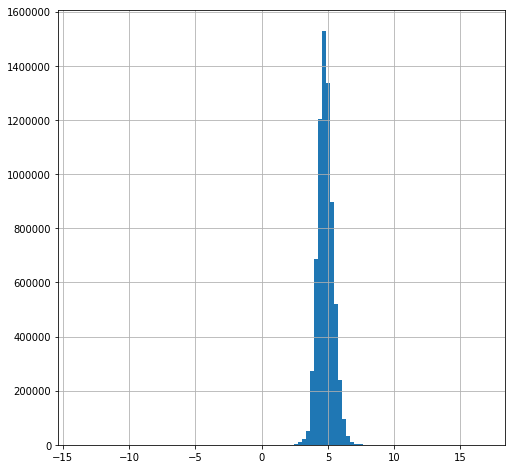

In [23]:
# nofmal distribution after log transformation
df_encode['log_price'].hist(bins=100)

In [24]:
df = df_encode.drop(['price_usd'], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926136 entries, 0 to 6926135
Data columns (total 22 columns):
srch_id                        int64
site_id                        int64
visitor_location_country_id    category
prop_country_id                category
prop_id                        category
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                bool
prop_location_score1           float64
prop_log_historical_price      float64
promotion_flag                 bool
srch_destination_id            category
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_bool       bool
click_bool                     bool
booking_bool                   bool
month                          category
log_price                      float64
dtypes: bool(5), category(5), float64(4), int64(8)
memo

## Test, Validate and train

In [26]:
# on average 25 properties per booking
len(df.index)/df["srch_id"].nunique() 

25.040894021179135

In [27]:
# sample serchids
sample = pd.Series(df['srch_id'].unique()).sample(60000, random_state = 64)
df1 = df.loc[df['srch_id'].isin(sample)]

In [28]:
df1.shape

(1500111, 22)

In [29]:
# split by search_id
from sklearn.model_selection import GroupShuffleSplit

df1.reset_index()['srch_id']
group = GroupShuffleSplit(n_splits=1, test_size=0.3)
train_dataset,test_dataset = next(group.split(X=df1, y=df1['booking_bool'], groups=df1.index.values))

In [30]:
# train test split: 0.7 on searchids
train_id = pd.Series(df1['srch_id'].unique()).sample(42000)
train = df1.loc[df1['srch_id'].isin(train_id)]
test = df1.loc[~df1['srch_id'].isin(train_id)]

In [31]:
print(test.shape)
print(train.shape)

(449679, 22)
(1050432, 22)


In [32]:
print(train['booking_bool'].value_counts(1)*100)

False    96.001645
True      3.998355
Name: booking_bool, dtype: float64


In [33]:
# Separate majority and minority classes
train_majority = train[train.click_bool==0]
train_minority = train[train.click_bool==1]

# Downsample majority class
train_majority_downsampled = train_majority.groupby('srch_id').apply(lambda x: x.sample(5, replace = True)).reset_index(drop=True)

# Combine minority class with dwonsampled majority class
train_downsampled = pd.concat([train_minority, train_majority_downsampled])
 
# Display new class counts
train_downsampled.booking_bool.value_counts()

False    214246
True      42000
Name: booking_bool, dtype: int64

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449679 entries, 367 to 6926096
Data columns (total 22 columns):
srch_id                        449679 non-null int64
site_id                        449679 non-null int64
visitor_location_country_id    449679 non-null category
prop_country_id                449679 non-null category
prop_id                        449679 non-null category
prop_starrating                449679 non-null int64
prop_review_score              449679 non-null float64
prop_brand_bool                449679 non-null bool
prop_location_score1           449679 non-null float64
prop_log_historical_price      449679 non-null float64
promotion_flag                 449679 non-null bool
srch_destination_id            449679 non-null category
srch_length_of_stay            449679 non-null int64
srch_booking_window            449679 non-null int64
srch_adults_count              449679 non-null int64
srch_children_count            449679 non-null int64
srch_room_count       

In [37]:
# Splits in data
X_train = train_downsampled.iloc[:, np.r_[ :19,20,21]]
y_train = train_downsampled.iloc[:,19]
X_test = test.iloc[:, np.r_[ :19,20,21]]
y_test = test.iloc[:,19]

In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449679 entries, 367 to 6926096
Data columns (total 21 columns):
srch_id                        449679 non-null int64
site_id                        449679 non-null int64
visitor_location_country_id    449679 non-null category
prop_country_id                449679 non-null category
prop_id                        449679 non-null category
prop_starrating                449679 non-null int64
prop_review_score              449679 non-null float64
prop_brand_bool                449679 non-null bool
prop_location_score1           449679 non-null float64
prop_log_historical_price      449679 non-null float64
promotion_flag                 449679 non-null bool
srch_destination_id            449679 non-null category
srch_length_of_stay            449679 non-null int64
srch_booking_window            449679 non-null int64
srch_adults_count              449679 non-null int64
srch_children_count            449679 non-null int64
srch_room_count       

In [40]:
# write out csvs
X_train.to_csv(r'C:\Users\Ao\Desktop\ML data\X_train1.csv', index = None, header=True)
y_train.to_csv(r'C:\Users\Ao\Desktop\ML data\y_train1.csv', index = None, header=True)
X_test.to_csv(r'C:\Users\Ao\Desktop\ML data\X_test1.csv', index = None, header=True)
y_test.to_csv(r'C:\Users\Ao\Desktop\ML data\y_test1.csv', index = None, header=True)

In [2]:
# read back csvs
X_train = pd.read_csv(r'C:\Users\Ao\Desktop\ML data\X_train1.csv')
y_train = pd.read_csv(r'C:\Users\Ao\Desktop\ML data\y_train1.csv')
X_test = pd.read_csv(r'C:\Users\Ao\Desktop\ML data\X_test1.csv')
y_test = pd.read_csv(r'C:\Users\Ao\Desktop\ML data\y_test1.csv')

In [3]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [4]:
# convert 1/0 integer values to boolean field and some integers or floats to objects
X_train['click_bool'] = X_train['click_bool'].astype('bool')
X_train['visitor_location_country_id'] = X_train['visitor_location_country_id'].astype('category')
X_train['prop_country_id'] = X_train['prop_country_id'].astype('category')
X_train['prop_id'] = X_train['prop_id'].astype('category')
X_train['prop_brand_bool'] = X_train['prop_brand_bool'].astype('bool')
X_train['promotion_flag'] = X_train['promotion_flag'].astype('bool')
X_train['srch_destination_id'] = X_train['srch_destination_id'].astype('category')
X_train['site_id'] = X_train['site_id'].astype('category')
X_train['srch_saturday_night_bool'] = X_train['srch_saturday_night_bool'].astype('bool')
X_train['month'] = X_train['month'].astype('category')

X_test['click_bool'] = X_test['click_bool'].astype('bool')
X_test['visitor_location_country_id'] = X_test['visitor_location_country_id'].astype('category')
X_test['prop_country_id'] = X_test['prop_country_id'].astype('category')
X_test['prop_id'] = X_test['prop_id'].astype('category')
X_test['prop_brand_bool'] = X_test['prop_brand_bool'].astype('bool')
X_test['promotion_flag'] = X_test['promotion_flag'].astype('bool')
X_test['srch_destination_id'] = X_test['srch_destination_id'].astype('category')
X_test['site_id'] = X_test['site_id'].astype('category')
X_test['srch_saturday_night_bool'] = X_test['srch_saturday_night_bool'].astype('bool')
X_test['month'] = X_test['month'].astype('category')

In [5]:
# extract all non-numeric columns
col_encode = list(X_train.select_dtypes(exclude=['number','bool']))

In [6]:
# encode non-numeric columns
X_train[col_encode] = X_train[col_encode].apply(LabelEncoder().fit_transform)

# convert all encoded variables back to categorical
for col in col_encode:
    X_train[col] = X_train[col].astype('category')
    
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256246 entries, 0 to 256245
Data columns (total 21 columns):
srch_id                        256246 non-null int64
site_id                        256246 non-null category
visitor_location_country_id    256246 non-null category
prop_country_id                256246 non-null category
prop_id                        256246 non-null category
prop_starrating                256246 non-null int64
prop_review_score              256246 non-null float64
prop_brand_bool                256246 non-null bool
prop_location_score1           256246 non-null float64
prop_log_historical_price      256246 non-null float64
promotion_flag                 256246 non-null bool
srch_destination_id            256246 non-null category
srch_length_of_stay            256246 non-null int64
srch_booking_window            256246 non-null int64
srch_adults_count              256246 non-null int64
srch_children_count            256246 non-null int64
srch_room_count       

In [7]:
# encode non-numeric columns
X_test[col_encode] = X_test[col_encode].apply(LabelEncoder().fit_transform)

# convert all encoded variables back to categorical
for col in col_encode:
    X_test[col] = X_test[col].astype('category')
    
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449679 entries, 0 to 449678
Data columns (total 21 columns):
srch_id                        449679 non-null int64
site_id                        449679 non-null category
visitor_location_country_id    449679 non-null category
prop_country_id                449679 non-null category
prop_id                        449679 non-null category
prop_starrating                449679 non-null int64
prop_review_score              449679 non-null float64
prop_brand_bool                449679 non-null bool
prop_location_score1           449679 non-null float64
prop_log_historical_price      449679 non-null float64
promotion_flag                 449679 non-null bool
srch_destination_id            449679 non-null category
srch_length_of_stay            449679 non-null int64
srch_booking_window            449679 non-null int64
srch_adults_count              449679 non-null int64
srch_children_count            449679 non-null int64
srch_room_count       

In [8]:
# save click_bool and srch_id from test
click_list = X_test['click_bool']
srchid_list = X_test['srch_id']

In [9]:
# remove click_bool and srch_id from train
X_train = X_train.drop(['click_bool', 'srch_id'], axis=1)

# remove click_bool and srch_id from test
X_test = X_test.drop(['click_bool', 'srch_id'], axis=1)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256246 entries, 0 to 256245
Data columns (total 19 columns):
site_id                        256246 non-null category
visitor_location_country_id    256246 non-null category
prop_country_id                256246 non-null category
prop_id                        256246 non-null category
prop_starrating                256246 non-null int64
prop_review_score              256246 non-null float64
prop_brand_bool                256246 non-null bool
prop_location_score1           256246 non-null float64
prop_log_historical_price      256246 non-null float64
promotion_flag                 256246 non-null bool
srch_destination_id            256246 non-null category
srch_length_of_stay            256246 non-null int64
srch_booking_window            256246 non-null int64
srch_adults_count              256246 non-null int64
srch_children_count            256246 non-null int64
srch_room_count                256246 non-null int64
srch_saturday_night_bo

## Decision Tree

In [45]:
np.random.seed(42)

# Choosing optimal depth of the tree
gs_dt1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [5,7,9,11], 
                               'criterion':['gini','entropy'], 
                              'min_samples_leaf':[4,6,8,10],
                              'min_samples_split':[2,4,6,8,10]}],
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=-1)

gs_dt1 = gs_dt1.fit(X_train,y_train)
print(gs_dt1.best_score_)
print(gs_dt1.best_params_)

0.6259966781759577
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [13]:
# train model with best parameters
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 4, min_samples_split= 10)
# predict probabilities on validation
dt_model = dt.fit(X_train, y_train)
y_dt_pred = dt_model.predict_proba(X_test)

In [63]:
# print evaluation measures
# AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss

dt_auc = roc_auc_score(y_test,y_dt_pred[:,1])
# log_loss
dt_log_loss = log_loss(y_test, y_dt_pred)

print('The Random Forest AUC score is %.3f'% dt_auc)
print('The Random Forest log loss is  %.3f' % dt_log_loss)

from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

y_pred = gs_dt1.predict(X_test)
y_pred_insample = gs_dt1.predict(X_train)

# Accuracy
print('Accuracy (out-of-sample): %.4f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.4f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): %.4f' % f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : %.4f' % f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): %.4f' % cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : %.4f' % cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

# Confusion matrix
from sklearn.metrics import confusion_matrix

Confusion_Matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted no', 'Predicted yes'],
    index=['True no', 'True yes'])

print(Confusion_Matrix)

The Random Forest AUC score is 0.614
The Random Forest log loss is  0.250
Accuracy (out-of-sample): 0.9600
Accuracy (in-sample): 0.8362
F1 score (out-of-sample): 0.4899
F1 score (in-sample)    : 0.4564
Kappa score (out-of-sample): -0.0003
Kappa score (in-sample)    : 0.0015
              precision    recall  f1-score   support

          no       0.96      1.00      0.98    217152
         yes       0.02      0.00      0.00      9000

   micro avg       0.96      0.96      0.96    226152
   macro avg       0.49      0.50      0.49    226152
weighted avg       0.92      0.96      0.94    226152

          Predicted no  Predicted yes
True no         217099             53
True yes          8999              1


## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [68]:
# random forest
gs_rm = GridSearchCV(estimator=RandomForestClassifier(random_state=64),
                  param_grid=[{'max_depth': [6,8,10,12], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[4,5,6,7,8,9],
                              'min_samples_split':[2,3,4,5],
                              'n_estimators':[100]}],
                  scoring='roc_auc', cv=5, n_jobs=-1)

gs_rm = gs_rm.fit(X_train, y_train)
print(gs_rm.best_score_)
print(gs_rm.best_params_)
print(gs_rm.best_estimator_)

# set the input parameters generated from GridSearch
rm_param = gs_rm.best_params_
# train model with best parameters
rm = RandomForestClassifier(**rm_param)
# predict probabilities on validation
rm_model = rm.fit(X_train, y_train)
y_rm_pred = rm_model.predict_proba(X_test)

0.6429658320234956
{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=64, verbose=0, warm_start=False)


In [70]:
# train model with best parameters
rm = RandomForestClassifier(**gs_rm.best_params_)
# predict probabilities on validation
rm_model = rm.fit(X_train, y_train)
y_rm_pred = rm_model.predict_proba(X_test)

In [71]:
# print evaluation measures
# AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss

rm_auc = roc_auc_score(y_test,y_rm_pred[:,1])
# log_loss
rm_log_loss = log_loss(y_test, y_rm_pred)

print('The Random Forest AUC score is %.3f'% rm_auc)
print('The Random Forest log loss is  %.3f' % rm_log_loss)

y_pred = gs_rm.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix

Confusion_Matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted no', 'Predicted yes'],
    index=['True no', 'True yes'])

print(Confusion_Matrix)

# understand which features matter the most
rm_importance = pd.DataFrame({'feature':X_train.columns,'importance':(rm_model.feature_importances_).ravel()})
rm_importance.sort_values(by='importance', ascending=False)

The Random Forest AUC score is 0.625
The Random Forest log loss is  0.242
          Predicted no  Predicted yes
True no         431679              0
True yes         18000              0


,feature,importance
18,log_price,0.190838
9,promotion_flag,0.119432
4,prop_starrating,0.087690
5,prop_review_score,0.086557
8,prop_log_historical_price,0.076500
3,prop_id,0.075661
7,prop_location_score1,0.069486
10,srch_destination_id,0.062791
12,srch_booking_window,0.055240
2,prop_country_id,0.033649


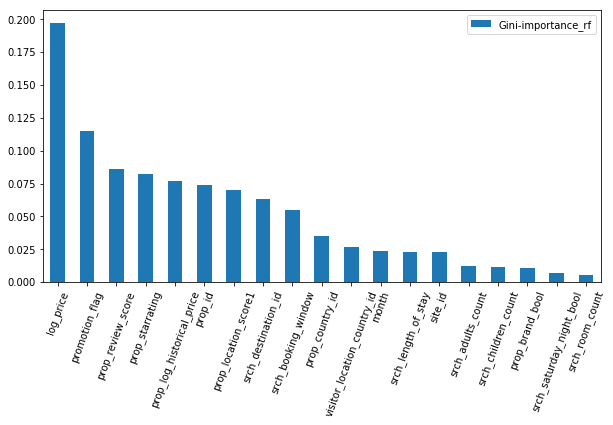

In [120]:
# output feature importance from random forests
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, gs_rm.best_estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    
importances_rf = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance_rf'})
importances_rf = importances_rf.sort_values('Gini-importance_rf', ascending = False)

importances_rf.plot(kind='bar', figsize=(10,5), rot=70)

### Gradient Boosting

In [11]:
from sklearn.model_selection import GridSearchCV, cross_val_score


# can also optimize decision tree params
gs_grb = GridSearchCV(estimator=GradientBoostingClassifier(loss='deviance', n_estimators=300, random_state=43),
                  param_grid=[{'learning_rate': [0.05], 'max_depth': [7],'min_samples_leaf': [4], 'min_samples_split': [10]}],
                  scoring='roc_auc', cv=5, n_jobs=-1)

gs_grb = gs_grb.fit(X_train, y_train)

print(gs_grb.best_score_)
print(gs_grb.best_params_)
print(gs_grb.best_estimator_)

0.6448262697692181
{'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=43,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [11]:
# can also optimize decision tree params
gs_grb = GridSearchCV(estimator=GradientBoostingClassifier(loss='deviance', n_estimators=100, random_state=43),
                  param_grid=[{'learning_rate': [0.1], 'max_depth': [7],'min_samples_leaf': [4], 'min_samples_split': [10]}],
                  scoring='roc_auc', cv=5, n_jobs=-1)

gs_grb = gs_grb.fit(X_train, y_train)

print(gs_grb.best_score_)
print(gs_grb.best_params_)
print(gs_grb.best_estimator_)

0.6474105854355443
{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=43,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [12]:
# train model with best parameters
grb = GradientBoostingClassifier(**gs_grb.best_params_)
# predict probabilities on validation
grb_model = grb.fit(X_train, y_train)
y_grb_pred = grb_model.predict_proba(X_test)

## Generate search result table

In [13]:
# generate results
# columns relavent for evaluting performance ran for y_dt_pred, y_rm_pred and y_gb_pred

# combine probability results 
y_pred = pd.DataFrame({'prob':y_grb_pred[:,1],'click_bool':click_list,'booking_bool':y_test, 'srch_id':srchid_list})
y_pred['position'] = 0
y_pred = y_pred.reset_index(0, drop=True)

# combine results and search criteria
rank_total = y_pred
rank_total['score'] = rank_total['click_bool']*1 + rank_total['booking_bool']*5

## Order display results by probability to click

In [14]:
# sort results by probability
rank = rank_total.groupby('srch_id', group_keys=False).apply(lambda x: x.sort_values('prob', ascending=False))

In [15]:
# order hotel displays within each search by probability
rank_order = rank.groupby('srch_id').head(10).reset_index(drop=True)

In [16]:
# adding rank of display by each search
rank_order['position'] = rank_order.groupby(['srch_id'])['position'].rank(method='first').astype(int).astype(str)

## Reshape resutls as input to evalute model

In [17]:
# reshape the dataframe to obtain desired format to calculate ndgc
ndgc_input = rank_order.pivot(index='srch_id', columns='position', values='score').reset_index()

In [18]:
# remove name on index column
del ndgc_input.columns.name
# change names for each column
new_names = [(i, 'rank_' + i) for i in ndgc_input.iloc[:,1:].columns.values]
ndgc_input.rename(columns = dict(new_names), inplace=True)

## NDGC function for model evalution

In [19]:
# dcg and ndgc calculation code
# source: https://www.kaggle.com/wendykan/ndcg-example
def dcg_at_k(r, k, method=0):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
     
    else:
            raise ValueError('method must be 0 or 1.')
    return 0.

def ndcg_at_k(r, k, method=0):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

## Calculate model performance

In [21]:
# decision tree
ndgc_input['ndcg'] = ndgc_input.iloc[:,1:].apply(lambda x: ndcg_at_k(x, 10), axis=1)
dt_score = ndgc_input['ndcg'].mean()
dt_score

0.34737545863143815

In [108]:
# random forests
ndgc_input['ndcg'] = ndgc_input.iloc[:,1:].apply(lambda x: ndcg_at_k(x, 10), axis=1)
rm_score = ndgc_input['ndcg'].mean()
rm_score

0.38110142063807706

In [20]:
# gradient boosting
ndgc_input['ndcg'] = ndgc_input.iloc[:,1:].apply(lambda x: ndcg_at_k(x, 10), axis=1)
gb_score = ndgc_input['ndcg'].mean()
gb_score # not the best result obtained before

0.32402582694003057

## benchmark result: random generated rankings

In [ ]:
X_total = pd.concat([X_test, y_test], axis=1)
X_total = X_total[['srch_id','click_bool','booking_bool']]
X_total['position'] = 0
# calculate score
X_total['score'] = X_total['click_bool']*1 + X_total['booking_bool']*5

In [ ]:
# pick top 10 random item
X_order = X_total.groupby('srch_id').head(10).reset_index(drop=True)
# randomly shuffle within group
X_order = X_order.groupby('srch_id').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)
# adding rank of display by each search
X_order['position'] = X_order.groupby(['srch_id'])['position'].rank(method='first').astype(int).astype(str)

In [ ]:
# reshape the dataframe to obtain desired format to calculate ndgc
random_input = X_order.pivot(index='srch_id', columns='position', values='score').reset_index()
# remove name on index column
del random_input.columns.name

# change names for each column
new_names = [(i, 'rank_' + i) for i in random_input.iloc[:,1:].columns.values]
random_input.rename(columns = dict(new_names), inplace=True)

In [ ]:
random_input['ndcg'] = random_input.iloc[:,1:].apply(lambda x: ndcg_at_k(x, 10), axis=1)
random_score = random_input['ndcg'].mean()
random_score